In [1]:
import numpy as np
import matplotlib.pyplot as plt

import adaptivealgo.cli.policy_iter as pi
from adaptivealgo.lib.simulator import Simulator
import adaptivealgo.cli.simulate_policy as sim

In [2]:
n_links = 4
f_thresh = 0.5
actions = [0.1, 0.2, 0.3]
alpha = 1.0
gamma = 0.1
tol = 1e-6

n_episodes = 10_000

In [3]:
policy, i = pi.find_policy(n_links, f_thresh, actions, alpha, gamma, tol)
print(policy)
print(f"Policy iteration took {i} iterations")

simulator = Simulator(policy["policy"], n_links, f_thresh, actions, alpha, gamma)
opt_samples = sim.gen_policy_samples(simulator, n_episodes)
print(f"Mean runtime: {np.mean(opt_samples)} steps")

{'n_links': 4, 'f_thresh': 0.5, 'actions': [0.1, 0.2, 0.3], 'alpha': 1.0, 'gamma': 0.1, 'policy': {'[]': 1, '[1]': 1, '[2]': 1, '[3]': 1, '[4]': 1, '[5]': 2, '[6]': 2, '[7]': 1, '[8]': 1, '[9]': 1, '[1, 1]': 1, '[1, 2]': 1, '[1, 3]': 1, '[1, 4]': 1, '[1, 5]': 2, '[1, 6]': 2, '[1, 7]': 1, '[1, 8]': 1, '[1, 9]': 1, '[2, 2]': 1, '[2, 3]': 1, '[2, 4]': 1, '[2, 5]': 2, '[2, 6]': 2, '[2, 7]': 1, '[2, 8]': 1, '[2, 9]': 1, '[3, 3]': 2, '[3, 4]': 2, '[3, 5]': 2, '[3, 6]': 2, '[3, 7]': 2, '[3, 8]': 2, '[3, 9]': 2, '[4, 4]': 2, '[4, 5]': 2, '[4, 6]': 2, '[4, 7]': 2, '[4, 8]': 2, '[4, 9]': 2, '[5, 5]': 2, '[5, 6]': 2, '[5, 7]': 2, '[5, 8]': 2, '[5, 9]': 2, '[6, 6]': 2, '[6, 7]': 2, '[6, 8]': 2, '[6, 9]': 2, '[7, 7]': 2, '[7, 8]': 2, '[7, 9]': 2, '[8, 8]': 2, '[8, 9]': 2, '[9, 9]': 2, '[1, 1, 1]': 1, '[1, 1, 2]': 1, '[1, 1, 3]': 1, '[1, 1, 4]': 1, '[1, 1, 5]': 2, '[1, 1, 6]': 2, '[1, 1, 7]': 1, '[1, 1, 8]': 1, '[1, 1, 9]': 1, '[1, 2, 2]': 1, '[1, 2, 3]': 1, '[1, 2, 4]': 1, '[1, 2, 5]': 2, '[1, 2, 6

In [4]:
sp_samples = {}

for action_idx, action in enumerate(actions):
    subopt_policy = {s: 0 for s in policy["policy"].keys()}

    try:
        simulator = Simulator(subopt_policy, n_links, f_thresh, [action], alpha, gamma)
    except AssertionError:
        sp_samples[action_idx] = []
        print(f"Mean runtime for action {action}: +inf steps")
        continue

    sp_samples[action_idx] = sim.gen_policy_samples(simulator, n_episodes)
    print(f"Mean runtime for action {action}: {np.mean(sp_samples[action_idx])} steps")

Mean runtime for action 0.1: 384.6176 steps
Mean runtime for action 0.2: 88.0291 steps
Mean runtime for action 0.3: 67.5709 steps


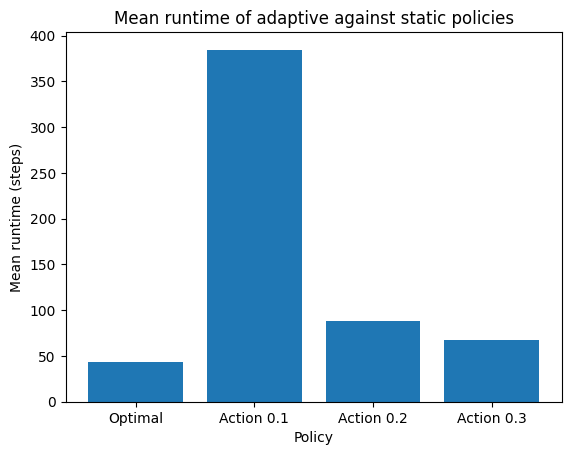

In [5]:
mean_runtimes = [np.mean(opt_samples)] + [np.mean(sp_samples[i]) for i in range(len(actions)) if sp_samples[i]]
policy_idxs = range(len(actions) + 1)

fig, ax = plt.subplots()
ax.bar(policy_idxs, mean_runtimes)
ax.set_xticks(policy_idxs)
ax.set_xticklabels(["Optimal"] + [f"Action {a}" for a in actions])
ax.set_ylabel("Mean runtime (steps)")
ax.set_xlabel("Policy")
ax.set_title("Mean runtime of adaptive against static policies")
plt.show()

In [9]:
means_opt = []
stds_opt = []

means_sp = []
stds_sp = []

all_opt_samples = []
all_sp_samples = []

for n_links in range(2, 6):

    policy, i = pi.find_policy(n_links, f_thresh, actions, alpha, gamma, tol)
    print(f"Policy iteration for {n_links} links took {i} iterations")

    simulator = Simulator(policy["policy"], n_links, f_thresh, actions, alpha, gamma)
    opt_samples = sim.gen_policy_samples(simulator, n_episodes)
    means_opt.append(np.mean(opt_samples))
    all_opt_samples.append(opt_samples)
    stds_opt.append(np.std(opt_samples))

    sp_samples = {}

    for action_idx, action in enumerate(actions):
        subopt_policy = {s: 0 for s in policy["policy"].keys()}

        try:
            simulator = Simulator(subopt_policy, n_links, f_thresh, [action], alpha, gamma)
        except AssertionError:
            sp_samples[action_idx] = [np.inf]
            continue

        sp_samples[action_idx] = sim.gen_policy_samples(simulator, n_episodes)

    print([np.mean(sp_samples[i]) for i in range(len(actions)) if sp_samples[i]])
    means_sp.append([np.mean(sp_samples[i]) for i in range(len(actions)) if sp_samples[i]])
    all_sp_samples.append(sp_samples)
    stds_sp.append([np.std(sp_samples[i]) for i in range(len(actions)) if sp_samples[i]])

Policy iteration for 2 links took 2 iterations
[27.6159, 11.8301, 7.6509]
Policy iteration for 3 links took 2 iterations
[87.0822, 28.1075, 18.3392]
Policy iteration for 4 links took 2 iterations
[380.8961, 88.5807, 68.2518]
Policy iteration for 5 links took 3 iterations
[2651.4096, 450.6916, 576.897]


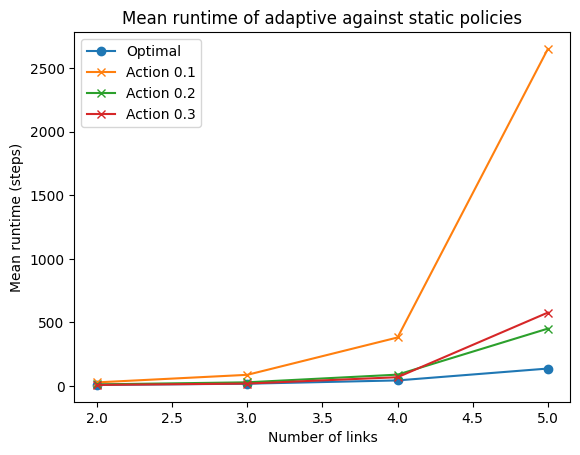

In [10]:
fig, ax = plt.subplots()
ax.plot(range(2, 6), means_opt, label="Optimal", marker="o")
for action_idx, action in enumerate(actions):
    ax.plot(range(2, 6), [means_sp[i][action_idx] for i in range(4)], label=f"Action {action}", marker="x")
ax.set_xlabel("Number of links")
ax.set_ylabel("Mean runtime (steps)")
ax.set_title("Mean runtime of adaptive against static policies")
ax.legend()
plt.show()

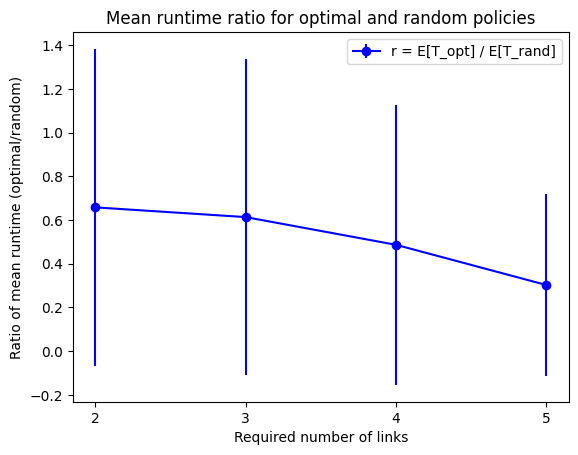

In [11]:
def ratio_std(m_x, sigma_x, m_y, sigma_y):
    return np.sqrt((sigma_x / m_x)**2 + (sigma_y / m_y)**2) * abs(m_x / m_y)

means_sa2 = [means_sp[i][1] for i in range(4)]
stds_sa2 = [stds_sp[i][1] for i in range(4)]

plt.errorbar(range(2, 6), np.array(means_opt) / np.array(means_sa2), yerr=[ratio_std(m_x, sigma_x, m_y, sigma_y) for m_x, sigma_x, m_y, sigma_y in zip(means_opt, stds_opt, means_sa2, stds_sa2)], color='b', marker='o', label='r = E[T_opt] / E[T_rand]')
plt.title('Mean runtime ratio for optimal and random policies')
plt.xlabel('Required number of links')
plt.ylabel('Ratio of mean runtime (optimal/random)')
plt.xticks(range(2, 6))
plt.legend()
plt.show()